##### 1. Importing Libraries

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

##### 2. Data exploration

In [2]:
df=pd.read_csv("T2D_abundance.csv")

In [3]:
df.shape

(344, 575)

In [4]:
df.describe()

,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Acidobacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Varibaculum|s__Varibaculum_cambriense,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_unclassified,...,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacteriales|f__Enterobacteriaceae|g__Providencia|s__Providencia_stuartii,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Oceanospirillales|f__Halomonadaceae|g__Halomonas|s__Halomonas_boliviensis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_kanaloae,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_axonopodis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_fuscans,k__Bacteria|p__Tenericutes|c__Mollicutes|o__Mycoplasmatales|f__Mycoplasmataceae|g__Mycoplasma|s__Mycoplasma_bovis,k__Bacteria|p__Bacteroidetes|c__Flavobacteriia|o__Flavobacteriales|f__Flavobacteriaceae|g__Zunongwangia|s__Zunongwangia_profunda,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_pallens,k__Bacteria|p__Planctomycetes|c__Planctomycetia|o__Planctomycetales|f__Planctomycetaceae|g__Rhodopirellula|s__Rhodopirellula_unclassified,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_furnissii
count,344.000000,344.000000,344.000000,344.0,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,...,344.0,344.000000,344.000000,344.000000,344.000000,344.000000,344.0,344.0,344.0,344.0
mean,0.109547,0.012080,0.006207,0.0,0.000680,0.001636,0.001250,0.000016,0.005366,0.000272,...,0.0,0.000137,0.000002,0.000092,0.000009,0.000034,0.0,0.0,0.0,0.0
std,0.637722,0.090682,0.063612,0.0,0.003986,0.010100,0.019552,0.000213,0.018747,0.001512,...,0.0,0.001897,0.000039,0.001567,0.000158,0.000524,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.002330,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,7.733550,1.369400,1.023360,0.0,0.058200,0.159660,0.360720,0.003590,0.164860,0.016250,...,0.0,0.031580,0.000730,0.028930,0.002930,0.009510,0.0,0.0,0.0,0.0


##### 3. Removing the columns which are not required

In [18]:
df = df.iloc[: , :-1]
df = df.drop(["Column1"], axis=1)
df.head()

,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Acidobacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Varibaculum|s__Varibaculum_cambriense,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_unclassified,...,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Oceanospirillales|f__Halomonadaceae|g__Halomonas|s__Halomonas_boliviensis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_kanaloae,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_axonopodis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_fuscans,k__Bacteria|p__Tenericutes|c__Mollicutes|o__Mycoplasmatales|f__Mycoplasmataceae|g__Mycoplasma|s__Mycoplasma_bovis,k__Bacteria|p__Bacteroidetes|c__Flavobacteriia|o__Flavobacteriales|f__Flavobacteriaceae|g__Zunongwangia|s__Zunongwangia_profunda,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_pallens,k__Bacteria|p__Planctomycetes|c__Planctomycetia|o__Planctomycetales|f__Planctomycetaceae|g__Rhodopirellula|s__Rhodopirellula_unclassified,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_furnissii,Class
0,0.33364,0.00000,0.0,0,0.0,0.0,0.0,0.0,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,n
1,0.49776,0.12802,0.0,0,0.0,0.0,0.0,0.0,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,n
2,0.00000,0.00000,0.0,0,0.0,0.0,0.0,0.0,0.01254,0.00262,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,n
3,0.00000,0.00000,0.0,0,0.0,0.0,0.0,0.0,0.02847,0.00000,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,n
4,0.49446,0.06786,0.0,0,0.0,0.0,0.0,0.0,0.02221,0.00000,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,n


##### 4.Plotting the count bar graph of diabetic patients

<AxesSubplot:title={'center':'count for type 2 diabetic patients'}>

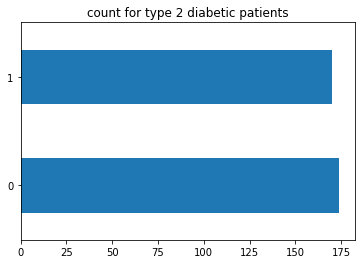

In [44]:
df["Class"]= df["Class"].apply(lambda x: 1 if x=="t2d" else 0)
df['Class'].value_counts().plot(kind='barh',title="count for type 2 diabetic patients")

##### 5. Removing the class column before normalisation of data

In [45]:
x= df.loc[:, df.columns != "Class"]
y=df["Class"].values
headers=list(x.columns)

In [46]:
x = StandardScaler().fit_transform(x)
pd.DataFrame(data=x, columns=headers).head()

,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Acidobacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Varibaculum|s__Varibaculum_cambriense,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_unclassified,...,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacteriales|f__Enterobacteriaceae|g__Providencia|s__Providencia_stuartii,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Oceanospirillales|f__Halomonadaceae|g__Halomonas|s__Halomonas_boliviensis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_kanaloae,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_axonopodis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_fuscans,k__Bacteria|p__Tenericutes|c__Mollicutes|o__Mycoplasmatales|f__Mycoplasmataceae|g__Mycoplasma|s__Mycoplasma_bovis,k__Bacteria|p__Bacteroidetes|c__Flavobacteriia|o__Flavobacteriales|f__Flavobacteriaceae|g__Zunongwangia|s__Zunongwangia_profunda,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_pallens,k__Bacteria|p__Planctomycetes|c__Planctomycetia|o__Planctomycetales|f__Planctomycetaceae|g__Rhodopirellula|s__Rhodopirellula_unclassified,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_furnissii
0,0.351908,-0.133409,-0.097711,0.0,-0.170735,-0.162213,-0.064003,-0.077094,-0.286620,-0.180177,...,0.0,-0.072415,-0.053995,-0.058945,-0.053995,-0.064157,0.0,0.0,0.0,0.0
1,0.609637,1.280397,-0.097711,0.0,-0.170735,-0.162213,-0.064003,-0.077094,-0.286620,-0.180177,...,0.0,-0.072415,-0.053995,-0.058945,-0.053995,-0.064157,0.0,0.0,0.0,0.0
2,-0.172028,-0.133409,-0.097711,0.0,-0.170735,-0.162213,-0.064003,-0.077094,0.383244,1.555499,...,0.0,-0.072415,-0.053995,-0.058945,-0.053995,-0.064157,0.0,0.0,0.0,0.0
3,-0.172028,-0.133409,-0.097711,0.0,-0.170735,-0.162213,-0.064003,-0.077094,1.234196,-0.180177,...,0.0,-0.072415,-0.053995,-0.058945,-0.053995,-0.064157,0.0,0.0,0.0,0.0
4,0.604455,0.616012,-0.097711,0.0,-0.170735,-0.162213,-0.064003,-0.077094,0.899798,-0.180177,...,0.0,-0.072415,-0.053995,-0.058945,-0.053995,-0.064157,0.0,0.0,0.0,0.0


##### 6. Checking variance with multiple PCA components

([<matplotlib.axis.XTick at 0x1ca63b6b0d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

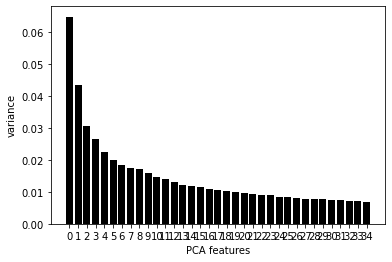

In [72]:
pca=PCA(n_components=35)
principalComponents = pca.fit_transform(x)
features = range(pca.n_components_)
plt.bar(features,pca.explained_variance_ratio_,color="black")
plt.xlabel("PCA features")
plt.ylabel("variance")
plt.xticks(features)

##### Observation: Looking at the bar graph seems like variance is distributed across all the feature components and not concentrated majorly on significant components. The variablity of data is very less captured by using only first two components. Hence PCA is not good approach for this dataset.

##### 7. Plotting scatter plot for 2 components

In [47]:
pca= PCA(n_components=2)
PrincipalComponents = pca.fit_transform(x)
df_pc = pd.DataFrame(data=PrincipalComponents, columns=["PC1","PC2"])

In [48]:
result_df = pd.concat([df_pc, df[['Class']]], axis=1)
result_df.head(5)


,PC1,PC2,Class
0,-1.133668,-0.442701,0
1,-0.963029,-0.463998,0
2,3.599932,-0.148577,0
3,-0.565224,-0.316538,0
4,-0.805288,-0.364151,0


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

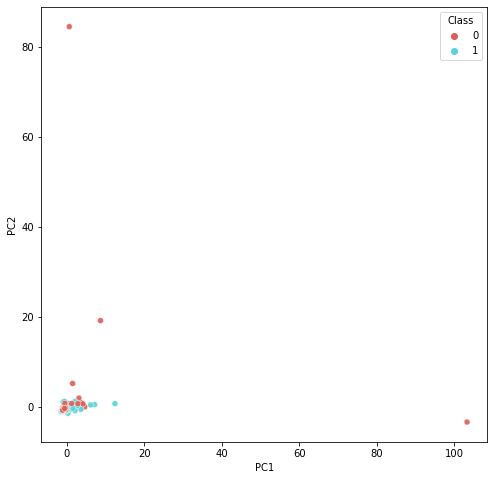

In [92]:
result_df.shape
fig = plt.figure(figsize = (8,8))
sns.scatterplot(x="PC1",y="PC2",hue="Class", palette=sns.color_palette("hls",2), data=result_df,legend="full",alpha=0.9)


##### Graph observation: Data points according to the disease status are not grouped. they are mix altogether in the graph.

##### 8. Checking the combined variance for first 2 components

In [55]:
var_ratio=pca.explained_variance_ratio_

In [56]:
print("total variance:",sum(var_ratio)*100)

total variance: 10.823747429876269


##### 10.8 is very less variance for 2 components. Hence PCA is not good approach for this dataset for dimentionality reduction.

### TSNE

In [73]:
from sklearn.manifold import TSNE

In [76]:
tsne=TSNE(n_components =2,verbose=1)
tsne_results = tsne.fit_transform(x)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 344 samples in 0.002s...
[t-SNE] Computed neighbors for 344 samples in 0.793s...
[t-SNE] Computed conditional probabilities for sample 344 / 344
[t-SNE] Mean sigma: 3.855613
[t-SNE] KL divergence after 250 iterations with early exaggeration: 101.984886
[t-SNE] KL divergence after 1000 iterations: 1.432944


In [80]:
result_df["tsne_one"]=tsne_results[:,0]
result_df["tsne_two"]=tsne_results[:,1]

<AxesSubplot:xlabel='tsne_one', ylabel='tsne_two'>

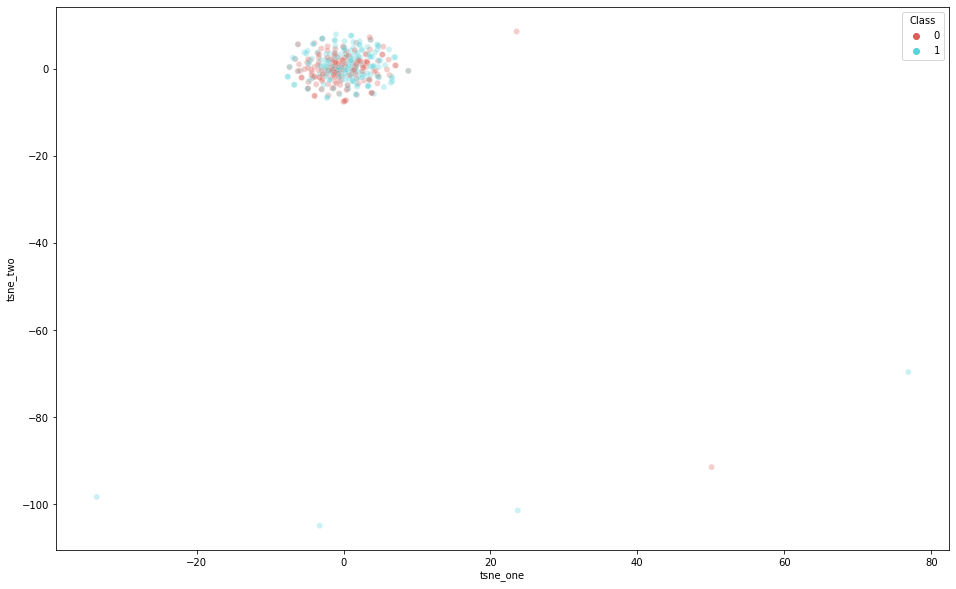

In [91]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="tsne_one",y="tsne_two",hue="Class", palette=sns.color_palette("hls",2), data=result_df,legend="full",alpha=0.9)


##### Graph Observation: t-SNE is also not good approach for this dataset. Datapoints are not clustered in their subgroups using t-SNE algorithm. We can't pick clustering algorithm to pick seperate cluster.